## Setup

In [1]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/CS\ 182\ Final\ Project/Phase\ 3

/content/drive/.shortcut-targets-by-id/1hzhdcGA40OipfzF0SRT7omKvzCSi0q4r/CS 182 Final Project/Phase 3


## Training

In [45]:
train_losses = []
train_epochs = []
val_losses = []

def get_path(path):
  i = os.listdir(path)[0]
  j = os.listdir(path + "/" + i)[0]
  return path + "/" + i + "/" + j

# exp_names = ['gpt2-xl-r64-a32', 'llama-3b-r64-a32', 'llama-7b-r64-a32']
# exp_names = ['gpt2-xl-r64-a32']
exp_names = ['gpt2-xl-r8-a32', 'gpt2-xl-r16-a32', 'gpt2-xl-r32-a32', 'gpt2-xl-r64-a32', 'gpt2-xl-r128-a32']

def plot_loss(exp_names, train, val, title):
  for exp_name in exp_names:
    train_losses = []
    train_epochs = []
    val_losses = []
    file_path = 'train_results/' + exp_name + '/runs'
    for summary in summary_iterator(get_path(file_path)):
        for v in summary.summary.value:
          if v.tag == "train/loss":
            train_losses.append(v.simple_value)
          elif v.tag == "eval/loss":
            val_losses.append(v.simple_value)
          elif v.tag == "train/epoch":
            train_epochs.append(v.simple_value)

    train_losses = np.array(train_losses)
    val_losses =  np.array(val_losses)
    train_epochs = np.array(train_epochs)

    if train:
      plt.plot(train_epochs[::2][:-1], train_losses, label='rank=' + (exp_name.split('-')[2][1:]))
      # plt.plot(train_epochs[::2][:-1], train_losses, label='train loss')
    if val:
      # plt.plot(train_epochs[::2][:-1], val_losses, label=' '.join(exp_name.split('-')[:2]))
      # plt.plot(train_epochs[::2][:-1], val_losses, label='validation loss')
      plt.plot(train_epochs[::2][:-1], val_losses, label='rank=' + (exp_name.split('-')[2][1:]))

  plt.xlabel("Training epochs")
  plt.ylabel("Cross Entropy Loss")
  plt.title(title)
  plt.legend()

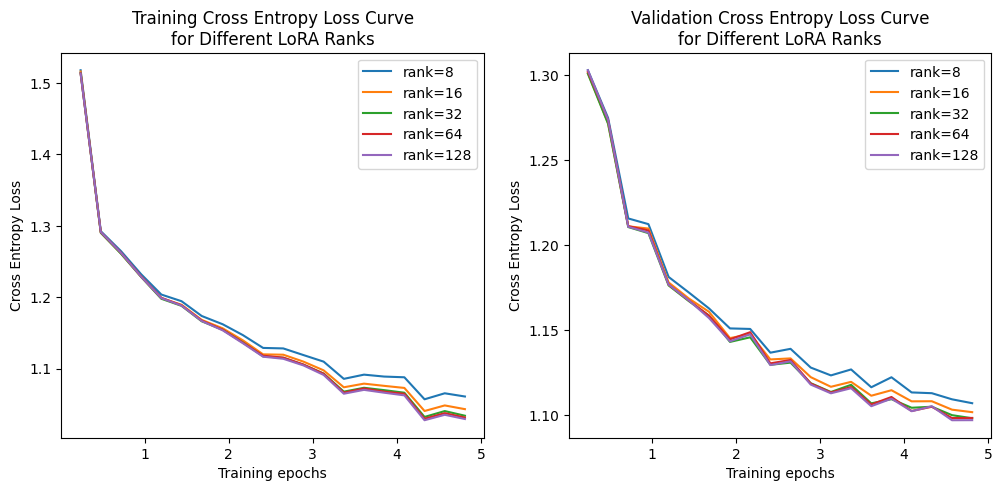

In [46]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_loss(exp_names, train=True, val=False, title="Training Cross Entropy Loss Curve\nfor Different LoRA Ranks")

plt.subplot(1, 2, 2)
plot_loss(exp_names, train=False, val=True, title="Validation Cross Entropy Loss Curve\nfor Different LoRA Ranks")

## Inference

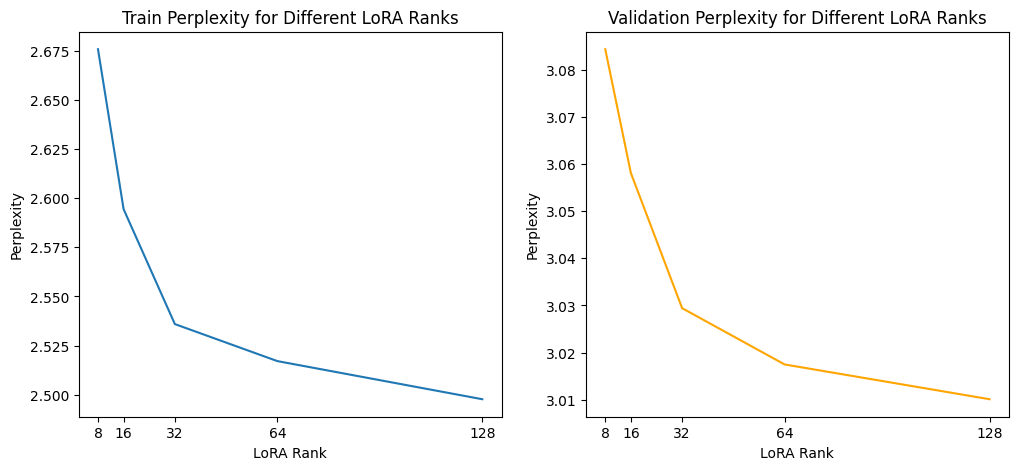

In [76]:
exp_names = ['gpt2-r8-a32-ppl', 'gpt2-r16-a32-ppl', 'gpt2-r32-a32-ppl', 'gpt2-r64-a32-ppl', 'gpt2-r128-a32-ppl']

train_ppl = []
val_ppl = []
ranks = [8, 16, 32, 64, 128]

for exp_name in exp_names:
  results = pd.read_csv('inference_results/' + exp_name + '.csv')
  results = results.groupby('dataset')['ppl'].mean()
  val_ppl.append(results['val'])
  train_ppl.append(results['train'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(ranks, train_ppl, label='train')
plt.xticks(ranks)
plt.title("Train Perplexity for Different LoRA Ranks")
plt.xlabel("LoRA Rank")
plt.ylabel("Perplexity")

plt.subplot(1, 2, 2)
plt.plot(ranks, val_ppl, label='val', color='orange')
plt.xticks(ranks)
plt.title("Validation Perplexity for Different LoRA Ranks")
plt.xlabel("LoRA Rank")
plt.ylabel("Perplexity");

In [84]:
exp_names = ['base-gpt2-ppl', 'gpt2-r64-a32-ppl', 'base-llama3b-ppl', 'llama3b-r64-a32-ppl', 'base-llama7b-ppl', 'llama7b-r64-a32-ppl']

gpt_base = pd.read_csv('inference_results/' + exp_names[0] + '.csv')
gpt_base = gpt_base.groupby('dataset')['ppl'].mean()
gpt_base_train = gpt_base['train']
gpt_base_val = gpt_base['val']

gpt_tuned = pd.read_csv('inference_results/' + exp_names[1] + '.csv')
gpt_tuned = gpt_tuned.groupby('dataset')['ppl'].mean()
gpt_tuned_train = gpt_tuned['train']
gpt_tuned_val = gpt_tuned['val']

llama3b_base = pd.read_csv('inference_results/' + exp_names[2] + '.csv')
llama3b_base = llama3b_base.groupby('dataset')['ppl'].mean()
llama3b_base_train = llama3b_base['train']
llama3b_base_val = llama3b_base['val']

llama3b_tuned = pd.read_csv('inference_results/' + exp_names[3] + '.csv')
llama3b_tuned = llama3b_tuned.groupby('dataset')['ppl'].mean()
llama3b_tuned_train = llama3b_tuned['train']
llama3b_tuned_val = llama3b_tuned['val']

llama7b_base = pd.read_csv('inference_results/' + exp_names[4] + '.csv')
llama7b_base = llama7b_base.groupby('dataset')['ppl'].mean()
llama7b_base_train = llama7b_base['train']
llama7b_base_val = llama7b_base['val']

llama7b_tuned = pd.read_csv('inference_results/' + exp_names[5] + '.csv')
llama7b_tuned = llama7b_tuned.groupby('dataset')['ppl'].mean()
llama7b_tuned_train = llama7b_tuned['train']
llama7b_tuned_val = llama7b_tuned['val']

In [90]:
pd.DataFrame.from_dict({'train perplexity' : [gpt_base_train, gpt_tuned_train, llama3b_base_train, llama3b_tuned_train, llama7b_base_train, llama7b_tuned_train],
 'validation perplexity': [gpt_base_val, gpt_tuned_val, llama3b_base_val, llama3b_tuned_val, llama7b_base_val, llama7b_tuned_val]},
                       orient='index', columns=['GPT2 base', 'GPT2 LoRA', 'Llama3B base', 'Llama3B LoRA', 'Llama7B base', 'Llama7B LoRA'])

,GPT2 base,GPT2 LoRA,Llama3B base,Llama3B LoRA,Llama7B base,Llama7B LoRA
train perplexity,9.994447,2.517161,3.476917,1.689392,3.575473,1.328803
validation perplexity,9.867359,3.017493,3.308356,2.378627,3.412157,1.839877
